In [1]:
%load_ext lab_black

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../data/PublicReleaseArrestDataUPDATE.csv")

In [4]:
data.head()

,ARR_DISTRICT,ARR_BEAT,ARR_YEAR,ARR_MONTH,RACE_CODE_CD,FBI_CODE,STATUTE,STAT_DESCR,CHARGE_CLASS_CD,CHARGE_TYPE_CD
0,10.0,1033.0,2017,8,BLK,18,720 ILCS 570.0/407-B-1,MFG/DEL COCAINE/SCH/PUB HS/PK,X,F
1,9.0,923.0,2017,8,WWH,WRT,725 ILCS 225.0/13,FUGITIVE FROM JUSTICE - OUT OF STATE WARRANT,Z,NaN
2,10.0,1024.0,2017,8,BLK,WRT,725 ILCS 5.0/110-3,ISSUANCE OF WARRANT,Z,NaN
3,11.0,1112.0,2017,8,BLK,18,720 ILCS 570.0/407-B-1,MFG/DEL HEROIN/SCH/PUB HS/PK,X,F
4,25.0,2524.0,2017,8,WHI,18,720 ILCS 570.0/402-C,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)(D),4,F


In [5]:
data.isnull().any()
# using 'RACE_CODE_CD" column to count as it does not have any NaN values

ARR_DISTRICT        True
ARR_BEAT            True
ARR_YEAR           False
ARR_MONTH          False
RACE_CODE_CD       False
FBI_CODE            True
STATUTE            False
STAT_DESCR         False
CHARGE_CLASS_CD     True
CHARGE_TYPE_CD      True
dtype: bool

In [6]:
data[data["ARR_DISTRICT"].isnull()]
# don't know why, probably missing data

,ARR_DISTRICT,ARR_BEAT,ARR_YEAR,ARR_MONTH,RACE_CODE_CD,FBI_CODE,STATUTE,STAT_DESCR,CHARGE_CLASS_CD,CHARGE_TYPE_CD
16,NaN,NaN,2017,9,BLK,26,720 ILCS 5.0/21-3-A-2,CRIMINAL TRESPASS TO LAND,B,M
133,NaN,NaN,2017,8,BLK,WRT,725 ILCS 5.0/110-3,ISSUANCE OF WARRANT,Z,NaN
209,NaN,NaN,2017,9,BLK,WRT,725 ILCS 5.0/110-3,ISSUANCE OF WARRANT,Z,NaN
258,NaN,NaN,2017,9,WHI,WRT,725 ILCS 5.0/110-3,ISSUANCE OF WARRANT,Z,NaN
427,NaN,NaN,2017,8,BLK,WRT,725 ILCS 5.0/110-3,ISSUANCE OF WARRANT,Z,NaN
...,...,...,...,...,...,...,...,...,...,...
410287,NaN,NaN,2017,3,BLK,TRF,625 ILCS 5.0/11-503-A-1,IVC - RECKLESS DRIVING,A,M
410370,NaN,NaN,2016,11,BLK,01A,720 ILCS 5.0/9-1-A-1,MURDER - FIRST DEGREE,M,F
410485,NaN,NaN,2017,3,WWH,WRT,725 ILCS 5.0/110-3,ISSUANCE OF WARRANT,Z,NaN
410674,NaN,NaN,2017,2,BLK,01A,720 ILCS 5.0/9-1-A-1,MURDER - FIRST DEGREE,M,F


In [7]:
arrestcounts = (
    data.pivot_table(
        values=["RACE_CODE_CD"],
        index=["ARR_DISTRICT"],
        columns=["ARR_YEAR"],
        aggfunc="count",
    )
    .rename(columns={"RACE_CODE_CD": "COUNT"})
    .rename_axis(index="Police District")
)
arrestcounts[("COUNT", "SUM")] = arrestcounts.COUNT.sum(axis=1)
arrestcounts

COUNT                            
ARR_YEAR          2014   2015   2016   2017    SUM
Police District                                   
1.0               5188   4335   3697   3205  16425
2.0               4756   3354   3086   2865  14061
3.0               6573   5058   3829   3584  19044
4.0               7417   6554   4230   4421  22622
5.0               6408   4978   4498   4838  20722
6.0               7340   6985   5434   5869  25628
7.0               7901   8768   6049   5609  28327
8.0               7640   6506   4379   3964  22489
9.0               6016   5600   4224   3973  19813
10.0              7810   6678   5406   5857  25751
11.0             16159  14186  10985  10968  52298
12.0              3755   3441   2557   2440  12193
14.0              2596   2193   1886   1690   8365
15.0              8813   7095   5295   4834  26037
16.0              3063   2929   2033   2110  10135
17.0              2160   2011   1604   1316   7091
18.0              3753   3004   2343   2900  12000
19.0              4152   3187   2629   2439  12407
20.0              1600   1371   1021   1094   5086
22.0              3309   2880   2409   2248  10846
24.0              2429   2377   1777   1587   8170
25.0              8760   8214   5525   4852  27351

In [8]:
from combine import recombine

In [9]:
pothole = recombine("../data/potholes_1.csv", "../data/potholes_2.csv")

In [10]:
pothole.head()

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,Community Area,SSA,LATITUDE,LONGITUDE,LOCATION
0,03/11/2014,Completed - Dup,04/20/2015,14-00343939,Pothole in Street,NaN,NaN,NaN,400 S AUSTIN BLVD,NaN,1.136454e+06,1.897424e+06,0.0,0.0,0.0,NaN,41.874650,-87.774615,"(41.874649785127, -87.774614950226)"
1,08/05/2018,Open,NaN,18-02306504,Pothole in Street,NaN,NaN,NaN,3921 W 77TH ST,60652.0,1.151404e+06,1.853111e+06,18.0,8.0,70.0,NaN,41.752697,-87.721288,"(41.752696566048, -87.721287716596)"
2,07/18/2018,Open,NaN,18-02134465,Pothole in Street,NaN,NaN,NaN,6030 N PETERSON AV EDENS XR,60646.0,1.142563e+06,1.939575e+06,39.0,16.0,12.0,NaN,NaN,NaN,NaN
3,11/26/2018,Open - Dup,NaN,18-03231860,Pothole in Street,NaN,NaN,NaN,5202 N LAKE SHORE DR SB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.976672,-87.650814,"(41.976671733589, -87.650813515591)"
4,04/26/2018,Completed,04/30/2018,18-01332777,Pothole in Street,Final Outcome,Pothole Patched,10.0,1500 N LUIS MUNOZ MARIN DR,60622.0,1.154972e+06,1.909808e+06,26.0,14.0,24.0,NaN,NaN,NaN,NaN


In [11]:
pothole.drop_duplicates(subset=["SERVICE REQUEST NUMBER"], inplace=True)

In [12]:
pothole.isnull().any()
# using 'CREATION DATE" column to count as it does not have any NaN values

CREATION DATE                         False
STATUS                                False
COMPLETION DATE                        True
SERVICE REQUEST NUMBER                False
TYPE OF SERVICE REQUEST               False
CURRENT ACTIVITY                       True
MOST RECENT ACTION                     True
NUMBER OF POTHOLES FILLED ON BLOCK     True
STREET ADDRESS                         True
ZIP                                    True
X COORDINATE                           True
Y COORDINATE                           True
Ward                                   True
Police District                        True
Community Area                         True
SSA                                    True
LATITUDE                               True
LONGITUDE                              True
LOCATION                               True
dtype: bool

In [13]:
pothole["creation_date"] = pd.to_datetime(pothole["CREATION DATE"])
pothole["completion_date"] = pd.to_datetime(pothole["COMPLETION DATE"])
pothole["creation_year"] = pd.DatetimeIndex(pothole["creation_date"]).year

In [14]:
potholecounts = pothole.pivot_table(
    values=["creation_date"],
    index=["Police District"],
    columns=["creation_year"],
    aggfunc="count",
).rename(columns={"creation_date": "COUNT"})[
    [("COUNT", 2014), ("COUNT", 2015), ("COUNT", 2016), ("COUNT", 2017)]
]
potholecounts[("COUNT", "SUM")] = potholecounts.COUNT.sum(axis=1)
potholecounts

COUNT                                 
creation_year       2014    2015    2016    2017      SUM
Police District                                          
0.0                530.0   140.0   123.0   124.0    917.0
1.0               3372.0  2221.0  1349.0  1404.0   8346.0
2.0               3211.0  1566.0  1384.0  1325.0   7486.0
3.0               3479.0  1433.0  1265.0  1492.0   7669.0
4.0               7079.0  2901.0  3313.0  3618.0  16911.0
5.0               3949.0  2073.0  1905.0  2307.0  10234.0
6.0               5965.0  2116.0  1971.0  2429.0  12481.0
7.0               2677.0  1380.0  1261.0  1332.0   6650.0
8.0              13084.0  7243.0  5749.0  6889.0  32965.0
9.0               6572.0  3564.0  2266.0  2451.0  14853.0
10.0              4390.0  2033.0  1508.0  1827.0   9758.0
11.0              3956.0  1280.0   830.0   961.0   7027.0
12.0              6753.0  3247.0  2327.0  2893.0  15220.0
13.0                 NaN     NaN     NaN     NaN      0.0
14.0              6981.0  2525.0  1834.0  2385.0  13725.0
15.0              2814.0   955.0   646.0   744.0   5159.0
16.0             12601.0  6630.0  5874.0  8170.0  33275.0
17.0              8651.0  2898.0  2938.0  4322.0  18809.0
18.0              4298.0  2444.0  1836.0  2092.0  10670.0
19.0              7473.0  2722.0  2470.0  3185.0  15850.0
20.0              3551.0  1304.0  1572.0  1942.0   8369.0
21.0                 NaN     NaN     NaN     NaN      0.0
22.0              6265.0  3307.0  3728.0  3647.0  16947.0
23.0                 NaN     NaN     NaN     NaN      0.0
24.0              5455.0  2106.0  2565.0  2863.0  12989.0
25.0              8942.0  3506.0  2616.0  3319.0  18383.0
31.0                20.0    37.0    39.0    24.0    120.0

In [15]:
potholecounts.index

Float64Index([ 0.0,  1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0,
              11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0,
              22.0, 23.0, 24.0, 25.0, 31.0],
             dtype='float64', name='Police District')

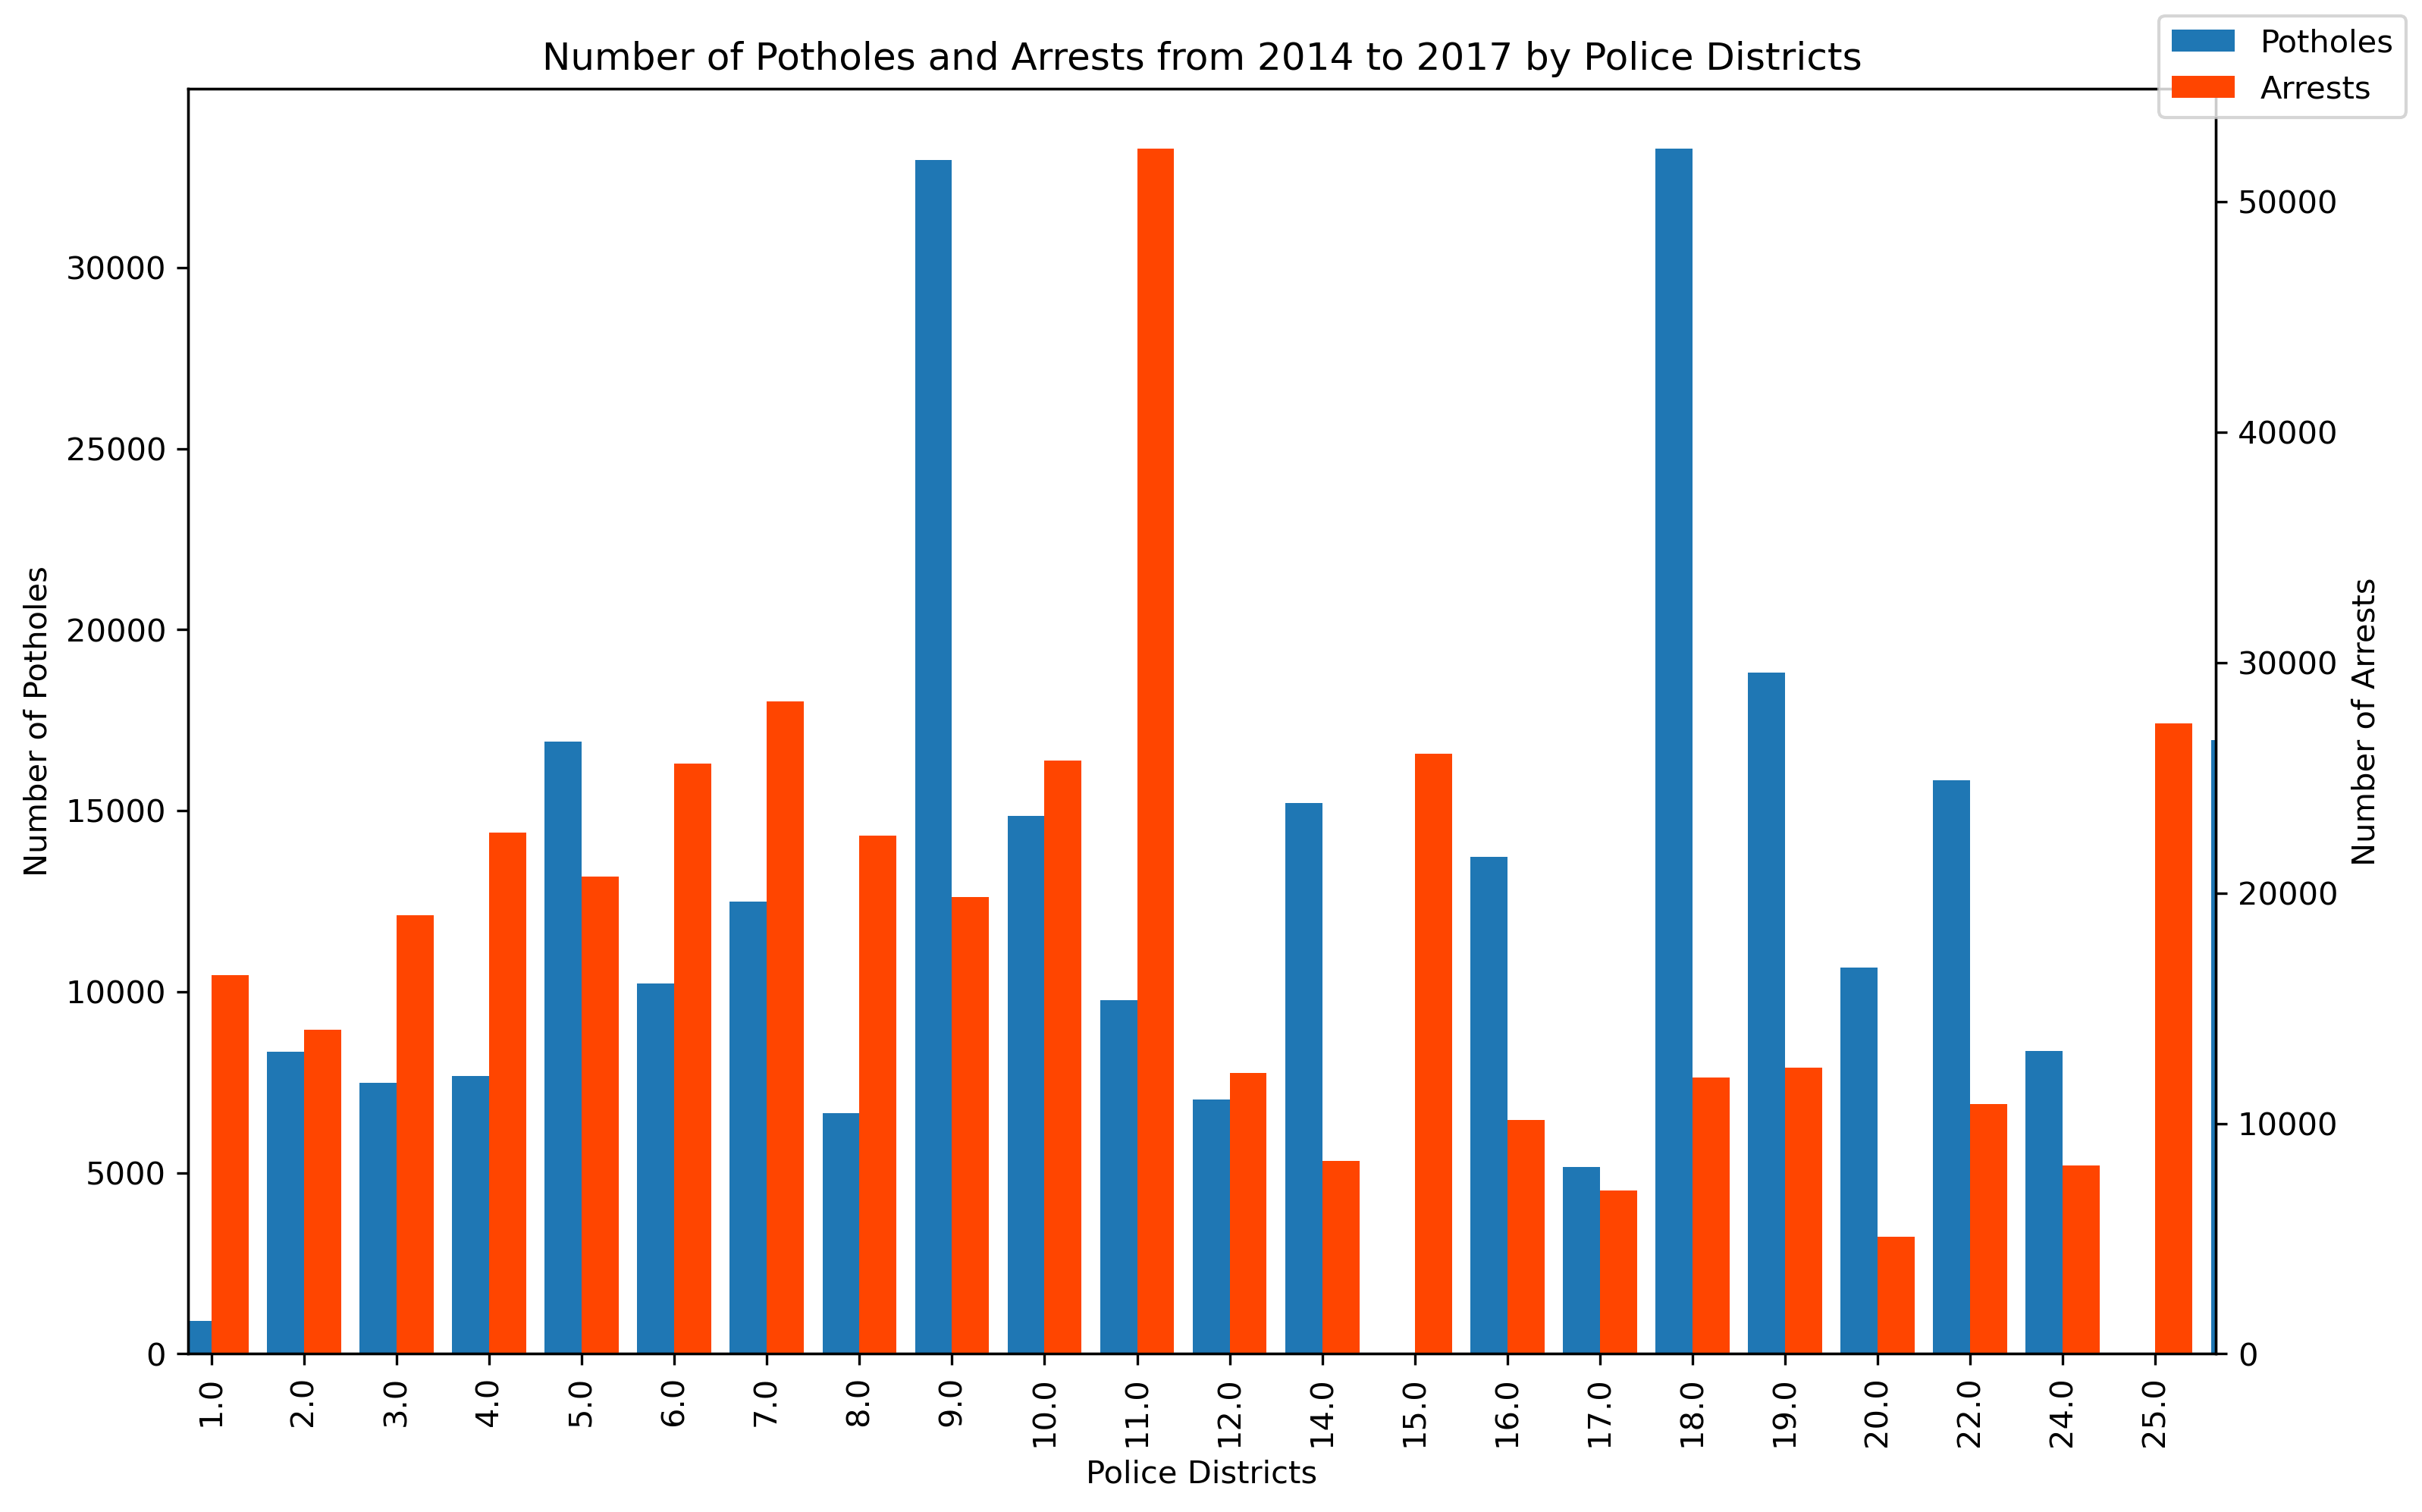

In [16]:
fig = plt.figure(figsize=(16 / 1.5, 10 / 1.5), dpi=300)

ax = fig.add_subplot(111)  # Create matplotlib axes
ax2 = ax.twinx()  # Create another axes that shares the same x-axis as ax.

width = 0.4

potholecounts[("COUNT", "SUM")].plot(
    kind="bar", ax=ax, width=width, position=1, label="Potholes"
)
arrestcounts[("COUNT", "SUM")].plot(
    kind="bar", color="orangered", ax=ax2, width=width, position=0, label="Arrests"
)

ax.set_title("Number of Potholes and Arrests from 2014 to 2017 by Police Districts")
ax.set_ylabel("Number of Potholes")
ax2.set_ylabel("Number of Arrests")
ax.set_xlabel("Police Districts")

fig.legend()

fig.tight_layout()
os.makedirs("../artifacts", exist_ok=True)
fig.savefig("../artifacts/arrests_and_potholes.png")
plt.show()

In [17]:
# Not sure if there's any relationship
# some police districts did not have any potholes